## 4.1 Avaliando o melhor modelo de regressão
Na aula de hoje, vamos explorar um dataset que contém algumas características sobre imóveis, tais como area, andar, suites, vista, e entre outros atributos.

Nosso desafio de hoje será tentar encontrar uma forma de criar um algortimo preditivo que utilize essas características para predizer o valor do imóvel, será que é possível?

Atributos:

    Ordem: Coluna de ID.
    Valor: Valor do imóvel.
    Area: Tamanho da área do imóvel.
    IA: Idade do imóvel.
    Andar: Quantidade de andares.
    Suites: Quantidade de suítes.
    Vista: Se o imóvel possúi uma boa vista ou não.
    DistBM: Distancia do Imovel do Mar.
    SemRuido: Se o imóvel é localizado em uma região calma ou não.
    AV100m: DistPróximo à área verde.

Vamos começar a trabalhar com os dados!

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('../dados/00.fase 2/Valorizacao_Ambiental.csv', sep=';')
df.head(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0


In [36]:
# Analisando valores nulas na base
df.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [37]:
df.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Variáveis binárias: 
- Vista
- Semruido
- AV100m

Variáveis discetas
- Suites

Variáveis contínuas:
- Ordem
- Valor
- Area
- IA
- DistBM

In [38]:
df.columns = ['ordem', 'valor', 'area', 'IA', 'andar', 'suites', 'vista', 'dist_bm', 'sem_ruido','av_100m']
df.head()

,ordem,valor,area,IA,andar,suites,vista,dist_bm,sem_ruido,av_100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


## Identificando a nossa variável alvo (target)

Text(0.5, 1.0, 'Histograma Valor')

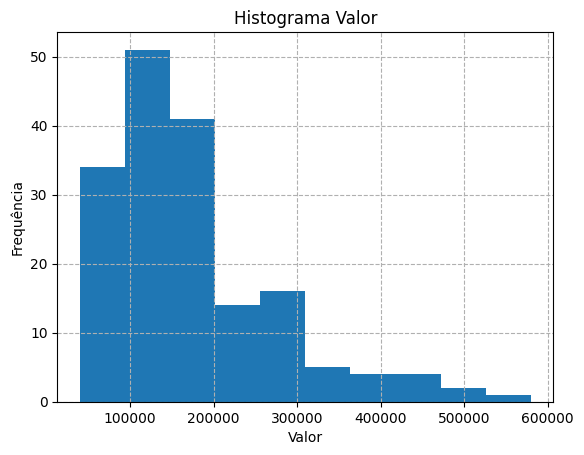

In [46]:
plt.hist(x=df['valor'])
plt.grid(linestyle='--')

plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma Valor')


In [40]:
df['valor_raiz'] = np.sqrt(df['valor'])
df

,ordem,valor,area,IA,andar,suites,vista,dist_bm,sem_ruido,av_100m,valor_raiz
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131
...,...,...,...,...,...,...,...,...,...,...,...
167,168,80000,82,14,2,0,0,485,1,0,282.842712
168,169,144000,134,11,2,0,1,827,1,1,379.473319
169,170,176000,135,9,3,2,1,414,1,1,419.523539
170,171,199956,141,1,6,2,0,305,0,0,447.164399


Vamos transformar o formato da variável principal para raiz quadrada.

A transformação pode ajudar a mostrar a relação proporcional entre diferentes quantidades de uma maneira mais clara e intuitiva.

Utilizando a transformação da escala em raiz quadrada, o valor será ajustada de forma que os valores menores sejam ampliados em relação aos valores maiores.

Text(0.5, 1.0, 'Histograma raíz quadrada de Valor')

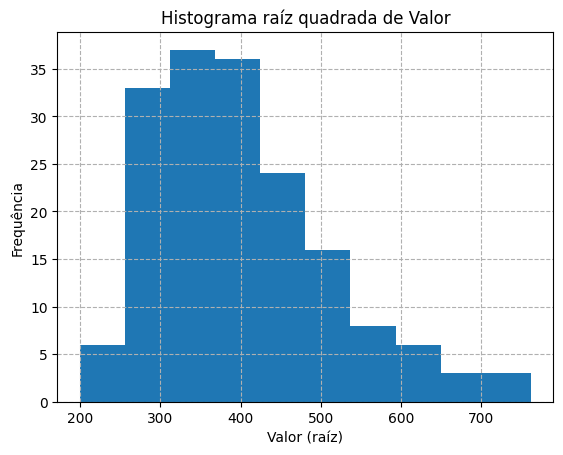

In [44]:
plt.hist(x=df['valor_raiz'])
plt.grid(linestyle='--')

plt.ylabel('Frequência')
plt.xlabel('Valor (raíz)')
plt.title('Histograma raíz quadrada de Valor')


## Explorando outras variáveis
Quais variáveis vão entrar no modelo de regressão?

### Variáveis quantitativas

Text(0, 0.5, 'Suítes')

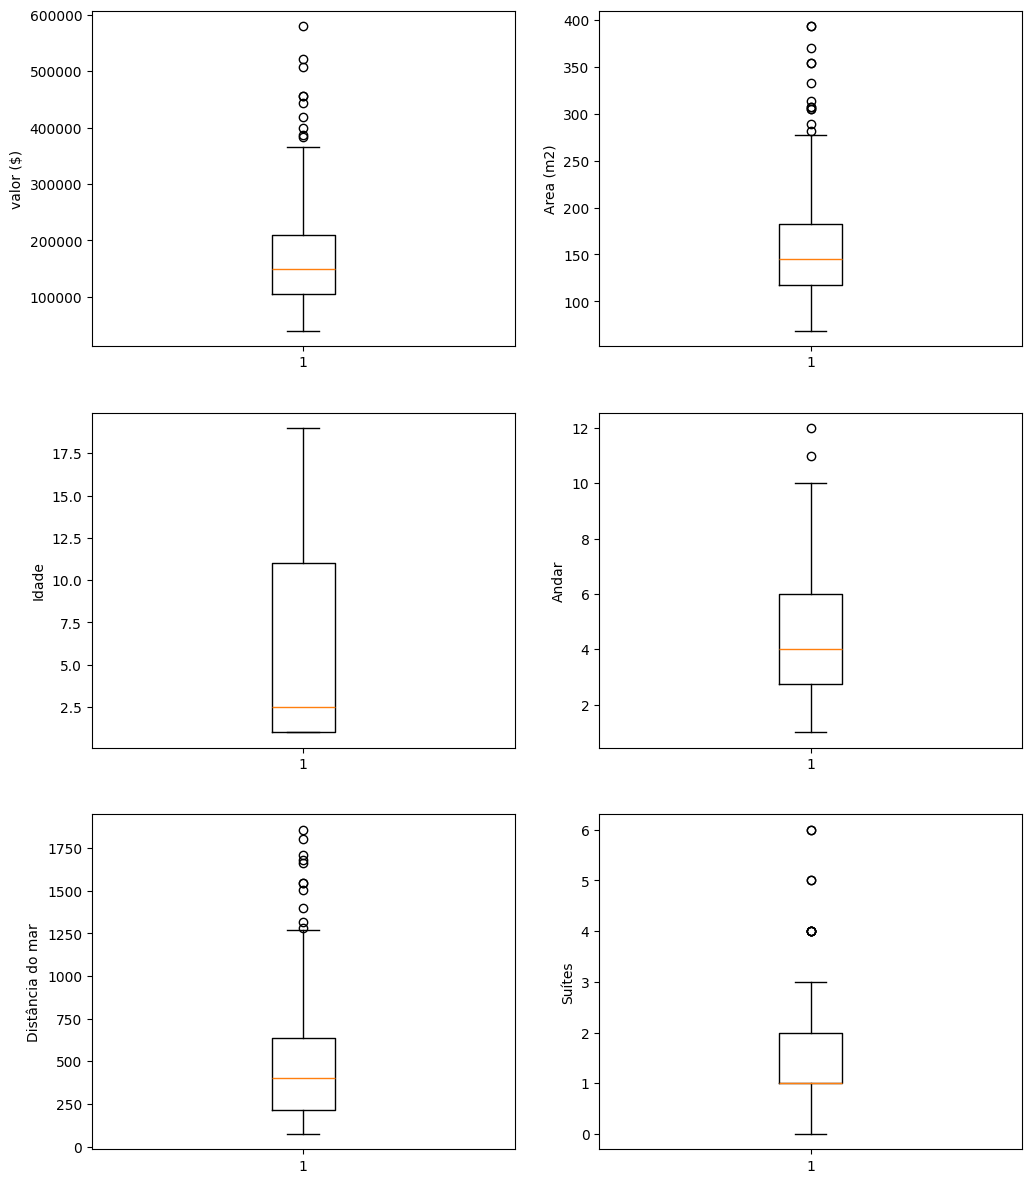

In [79]:
fig = plt.figure(figsize=(12,20))

ax1 = plt.subplot(4,2,1) # 1/4 de altura e 1/2 de espessura
ax1.boxplot(data=df, x='valor')
ax1.set_ylabel('valor ($)')

ax1 = plt.subplot(4,2,2)
ax1.boxplot(data=df, x='area')
ax1.set_ylabel('Area (m2)')

ax1 = plt.subplot(4,2,3)
ax1.boxplot(data=df, x='IA')
ax1.set_ylabel('Idade')

ax1 = plt.subplot(4,2,4)
ax1.boxplot(data=df, x='andar')
ax1.set_ylabel('Andar')

ax1 = plt.subplot(4,2,5)
ax1.boxplot(data=df, x='dist_bm')
ax1.set_ylabel('Distância do mar')

ax1 = plt.subplot(4,2,6)
ax1.boxplot(data=df, x='suites')
ax1.set_ylabel('Suítes')

In [81]:
correlation = df.corr().round(2)
correlation

,ordem,valor,area,IA,andar,suites,vista,dist_bm,sem_ruido,av_100m,valor_raiz
ordem,1.00,0.34,-0.15,0.01,0.02,0.26,0.15,0.05,0.01,-0.01,0.36
valor,0.34,1.00,0.77,-0.33,0.31,0.72,0.27,-0.05,0.22,0.37,0.99
area,-0.15,0.77,1.00,-0.15,0.16,0.53,0.09,-0.12,0.11,0.30,0.77
IA,0.01,-0.33,-0.15,1.00,-0.38,-0.32,-0.01,-0.01,-0.14,-0.14,-0.35
andar,0.02,0.31,0.16,-0.38,1.00,0.23,0.01,0.25,0.02,0.22,0.33
suites,0.26,0.72,0.53,-0.32,0.23,1.00,0.04,-0.11,0.12,0.25,0.73
vista,0.15,0.27,0.09,-0.01,0.01,0.04,1.00,-0.10,0.04,0.34,0.25
dist_bm,0.05,-0.05,-0.12,-0.01,0.25,-0.11,-0.10,1.00,0.40,-0.10,-0.05
sem_ruido,0.01,0.22,0.11,-0.14,0.02,0.12,0.04,0.40,1.00,0.23,0.20
av_100m,-0.01,0.37,0.30,-0.14,0.22,0.25,0.34,-0.10,0.23,1.00,0.36


Analisando as correlaçãoes:

Correlação de Pearson - quando as variáveis são núméricas quantitativas
- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
- ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

<Axes: >

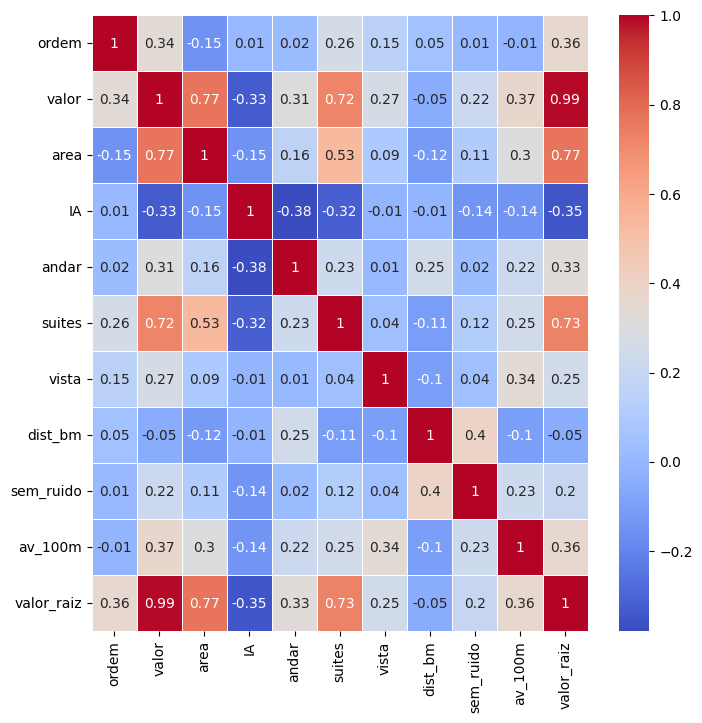

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax, cmap='coolwarm')

Text(0, 0.5, 'Valor (R$)')

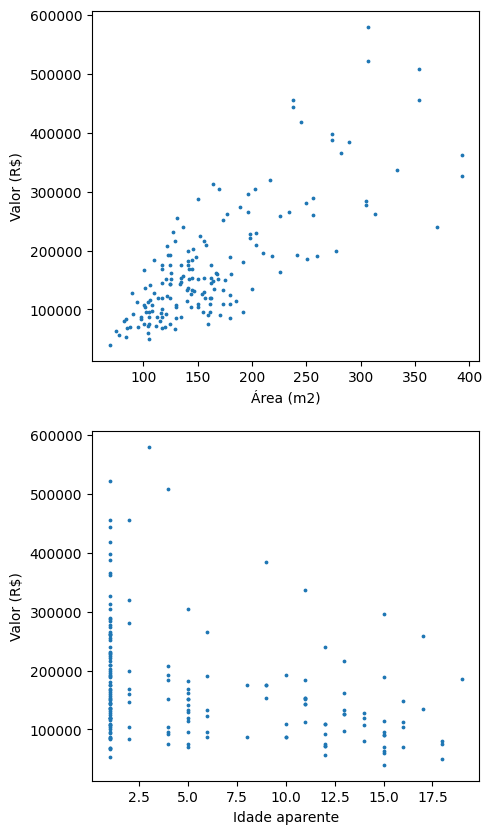

In [118]:
fig = plt.figure(figsize=(5,10))

ax1 = plt.subplot(2,1,1) 
ax1.scatter('area','valor',data=df, s=3)
ax1.set_xlabel('Área (m2)')
ax1.set_ylabel('Valor (R$)')

ax1 = plt.subplot(2,1,2)
ax1.scatter('IA','valor',data=df, s=3)
ax1.set_xlabel('Idade aparente')
ax1.set_ylabel('Valor (R$)')

### Variáveis binárias

In [119]:
df.head(3)

,ordem,valor,area,IA,andar,suites,vista,dist_bm,sem_ruido,av_100m,valor_raiz
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894


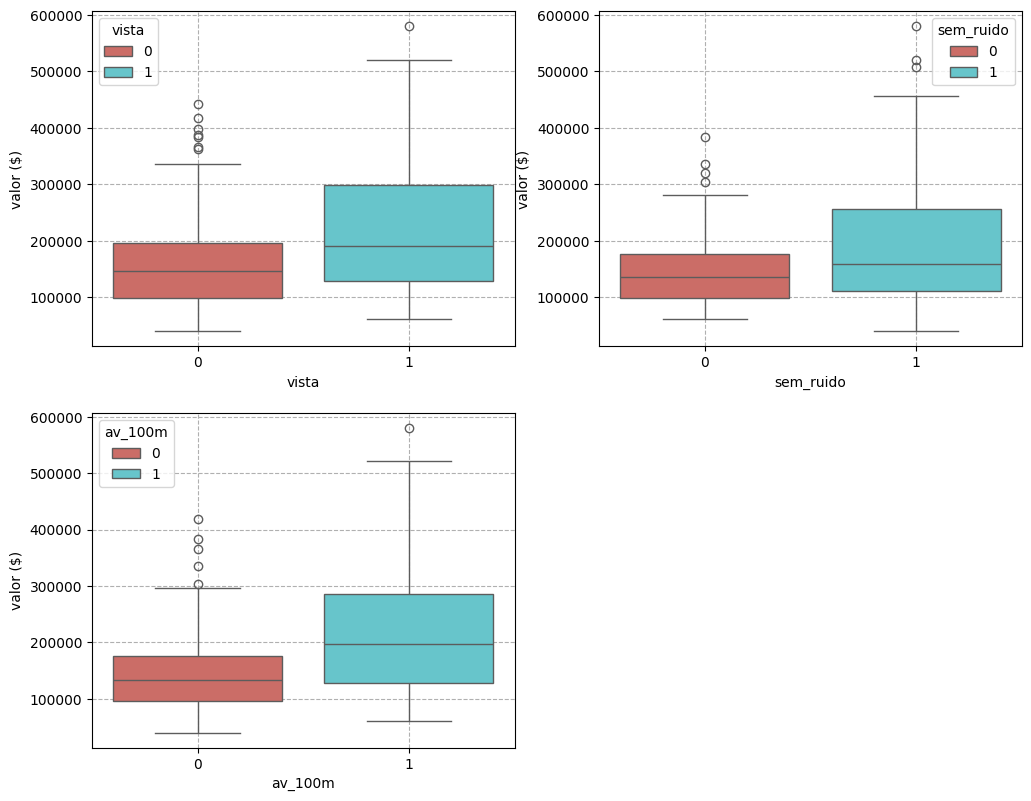

In [139]:
fig = plt.figure(figsize=(12,20))

ax1 = plt.subplot(4,2,1) 
sns.boxplot(data=df, x='vista', y='valor', palette='hls', ax=ax1, hue='vista')
ax1.set_ylabel('valor ($)')
ax1.grid(linestyle='--')

ax2 = plt.subplot(4,2,2) 
sns.boxplot(data=df, x='sem_ruido', y='valor', palette='hls', ax=ax2, hue='sem_ruido')
ax2.set_ylabel('valor ($)')
ax2.grid(linestyle='--')

ax3 = plt.subplot(4,2,3) 
sns.boxplot(data=df, x='av_100m', y='valor', palette='hls', ax=ax3, hue='av_100m')
ax3.set_ylabel('valor ($)')
ax3.grid(linestyle='--')

# Montando nosso modelo

## Modelo de Regressão Linear

In [140]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [141]:
# X: variáveis preditoras ou independentes
X = df[['area','suites','IA','sem_ruido','vista','andar','av_100m','dist_bm']]

# Y: variável target ou dependente
Y = df[['valor']]

In [150]:
Y.shape

(172, 1)

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [151]:
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

**Intercepto:** O valor esperado da variável dependente quando todas as variáveis independentes são iguais. É o ponto onde a linha cruza o eixo y. 

In [152]:
print(f'Intercepto: {lr.intercept_}')

Intercepto: [-40165.8752773]


**Coeficientes:** Representam as inclinações da linha de regressão para CADA variável

In [153]:
coef = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coef

,0,0
0,area,815.218075
1,suites,34315.785459
2,IA,-1052.417100
3,sem_ruido,17027.508944
4,vista,63486.030935
5,andar,5635.237485
6,av_100m,-5672.535051
7,dist_bm,-2.522530


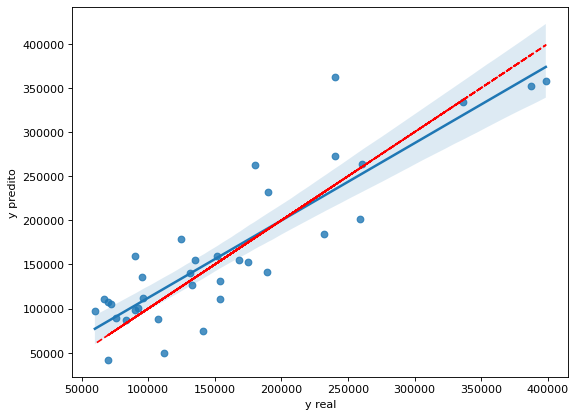

In [158]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = sns.regplot(x=Y_test, y=Y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(Y_test, Y_test, '--r')

### Avaliando o modelo

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [161]:
MAE = mean_absolute_error(Y_test, Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'MAE = {MAE}\nMSE = {MSE}\nr2 = {r2}')

MAE = 34422.98857094568
MSE = 1844288772.1790047
r2 = 0.758459196912501


r2 tem que se APROXIMAR de um, mas nunca ser 1 — isso é evidência de **OVERFITTING**

## Avaliando com DecisionTreeRegressor

Observamos que nosso modelo de regressão linear se comportou bem, mas e se tentarmos criar um novo modelo sob um outro tipo de algoritmo diferente?

Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.

Vamos testar?

In [162]:
from sklearn.tree import DecisionTreeRegressor

In [163]:
# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=7, max_depth=10)
model_dtr.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, random_state=7)

In [164]:
y_pred_model_dtr = model_dtr.predict(X_test)

In [166]:
# Avaliando o modelo
MAE = mean_absolute_error(Y_test, y_pred_model_dtr)
MSE = mean_squared_error(Y_test, y_pred_model_dtr)
r2 = r2_score(Y_test, y_pred_model_dtr)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)

MAE 39338.92244897959
MSE 2532451627.6991253
r² 0.6683326336081382


## Avaliando com SVR

Vamos agora testar um outro tipo de algoritmo para analisar a performace, o Support Vector Regression. O SVR, é usado para tarefas de regressão, em que a tarefa é prever um valor contínuo em vez de uma classe.

In [167]:
from sklearn.svm import SVR
# Criando o modelo de SVM
svr = SVR(kernel='linear')

In [168]:
svr.fit(X_train, Y_train)
y_pred_svr = svr.predict(X_test)

d:\_FIAP\01.Git\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
# Avaliando o modelo
MAE = mean_absolute_error(Y_test, y_pred_svr)
MSE = mean_squared_error(Y_test, y_pred_svr)
r2 = r2_score(Y_test, y_pred_svr)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)

MAE 43153.53918496288
MSE 3123421996.7782364
r² 0.5909350700044546
